# K-Nearest Neighbors Algorithm

* Last class, we introduced the probabilistic generative classifier.  
* As discussed, the probabilistic generative classifier requires us to assume a parametric form for each class (e.g., each class is represented by a multi-variate Gaussian distribution, etc..).  Because of this, the probabilistic generative classifier is a *parametric* approach.
* Parametric approaches have the drawback that the functional parametric form needs to be decided/assumed in advance and, if chosen poorly, might be a poor model of the distribution that generates the data resulting in poor performance. 
* Non-parametric methods are those that do not assume a particular generating distribution for the data.  The $K$-nearest neighbors algorithm is one example of a non-parametric classifier. 




* Nearest neighbor methods compare a test point to the $k$ nearest training data points and then estimate an output value based on the desired/true output values of the $k$ nearest training points
* Essentially, there is no ''training'' other than storing the training data points and their desired outputs
* In test, you need to: (1) determine which $k$ training data points are closest to the test point; and (2) determine the output value for the test point 
* In order to find the $k$ nearest neighbors in the training data, you need to define a *similarity measure* or a *dissimilarity measure*.  The most common dissimilarity measure is Euclidean distance. 
    * Euclidean distance: $d_E = \sqrt{\left(\mathbf{x}_1-\mathbf{x}_2\right)^T\left(\mathbf{x}_1-\mathbf{x}_2\right)}$
    * City block distance: $d_C = \sum_{i=1}^d \left| x_{1i} - x_{2i} \right|$
    * Mahalanobis distance: $\left(\mathbf{x}_1-\mathbf{x}_2\right)^T\Sigma^{-1}\left(\mathbf{x}_1-\mathbf{x}_2\right)$
    * Geodesic distance
    * Cosine angle similarity: $\cos \theta = \frac{\mathbf{x}_1^T\mathbf{x}_2}{\left\|\mathbf{x}_1\right\|_2^2\left\|\mathbf{x}_2\right\|_2^2}$
    * and many more...


* If you are doing classification, once you find the $k$ nearest neighbors to your test point in the training data, then you can determine the class label of your test point using (most commonly) *majority vote*
* If there are ties, they can be broken randomly or using schemes like applying the label of the closest data point in the neighborhood
*  Of course, there are MANY modifications you can make to this.  A common one is to weight the votes of each of the nearest neighbors by their distance/similarity measure value.  If they are closer, they get more weight. 


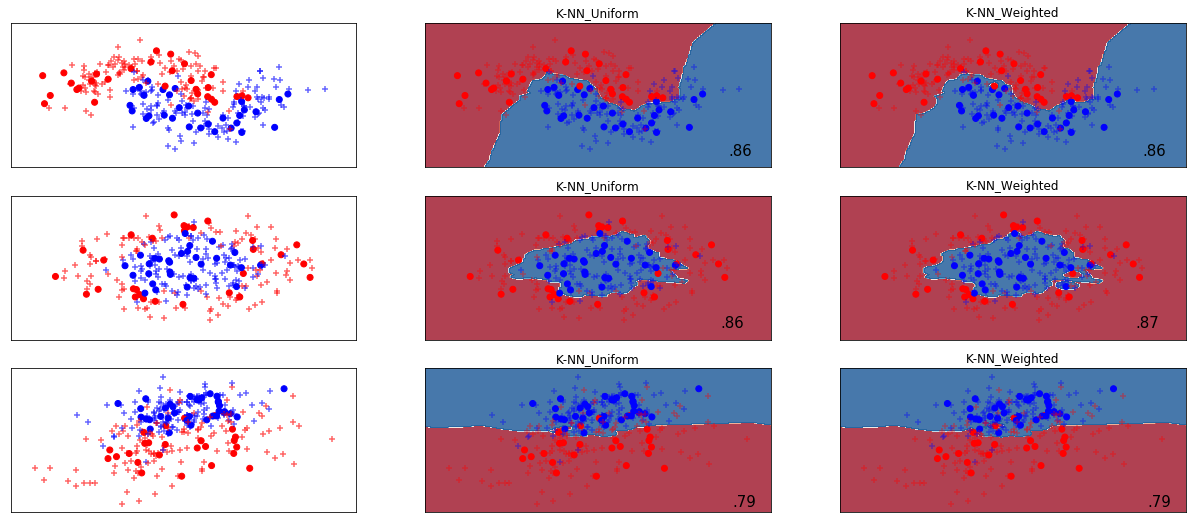

In [1]:
# Reference for some code: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn import neighbors
%matplotlib inline 

#figure params
h = .02  # step size in the mesh
figure = plt.figure(figsize=(17, 9))

#set up classifiers
n_neighbors = 3
classifiers = []
classifiers.append(neighbors.KNeighborsClassifier(n_neighbors, weights='uniform'))
classifiers.append(neighbors.KNeighborsClassifier(n_neighbors, weights='distance'))
names = ['K-NN_Uniform', 'K-NN_Weighted']

#Put together datasets
n_samples = 300
X, y = make_classification(n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples, noise=0.3, random_state=0),
            make_circles(n_samples,  noise=0.2, factor=0.5, random_state=1),
            linearly_separable]



i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)  #split into train/test folds

    #set up meshgrid for figure
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright,
                   alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

# Error and Evaluation Metrics

* A key step in machine learning algorithm development and testing is determining a good error and evaluation metric. 

* Evaluation metrics help us to estimate how well our model is trained and it is important to pick a metric that matches our overall goal for the system.  

* Some common evaluation metrics include precision, recall, receiver operating curves, and confusion matrices.

### Classification Accuracy and Error 

* Classification accuracy is defined as the number of correctly classified samples divided by all samples:

\begin{equation}
\text{accuracy} = \frac{N_{cor}}{N} 
\end{equation}
where $N_{cor}$ is the number of correct classified samples and $N$ is the total number of samples.

* Classification error is defined as the number of incorrectly classified samples divided by all samples:

\begin{equation}
\text{error} = \frac{N_{mis}}{N}
\end{equation}
where $N_{mis}$ is the number of misclassified samples and $N$ is the total number of samples.

* Suppose there is a 3-class classification problem, in which we would like to classify each training sample (a fish) to one of the three classes (A = salmon or B = sea bass or C = cod). 

* Let's assume there are 150 samples, including 50 salmon, 50 sea bass and 50 cod.  Suppose our model misclassifies 3 salmon, 2 sea bass and 4 cod.

* Prediction accuracy of our binary classification model is calculated as:

\begin{equation}
\text{accuracy} = \frac{47+48+46}{50+50+50} = \frac{47}{50}
\end{equation}

* Prediction error is calculated as:

\begin{equation}
\text{error} = \frac{N_{mis}}{N} = \frac{3+2+4}{50+50+50} = \frac{3}{50}
\end{equation}



### Confusion Matrices

* A confusion matrix summarizes the classification accuracy across several classes. It shows the ways in which our classification model is confused when it makes predictions, allowing visualization of the performance of our algorithm. Generally, each row represents the instances of an actual class while each column represents the instances in a predicted class. 

* If our classifier is trained to distinguish between salmon, sea bass and cod, then we can summarize the prediction result in the confusion matrix as follows:
    

| Actual/Predicted | Salmon | Sea bass | Cod  |
| --- | --- | --- | --- |
| Salmon | 47 | 2 | 1 |
| Sea Bass | 2 | 48 | 0 |
| Cod | 0 | 0 | 50 |

* In this confusion matrix, of the 50 actual salmon, the classifier predicted that 2 are sea bass, 1 is cod incorrectly and 47 are labeled salmon correctly. All correct predictions are located in the diagonal of the table. So it is easy to visually inspect the table for prediction errors, as they will be represented by values outside the diagonal. 

### TP, FP, TN, and FN

* True positive (TP): correctly predicting event values
* False positive (FP): incorrectly calling non-events as an event
* True negative (TN): correctly predicting non-event values
* False negative (FN): incorrectly labeling events as non-event


* Precision is also called positive predictive value.

\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}
\end{equation}

* Recall is also called true positive rate, probability of detection

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}
\end{equation}


* Fall-out is also called false positive rate, probability of false alarm.

\begin{equation}
\text{Fall-out} = \frac{\text{FP}}{\text{N}}= \frac{\text{FP}}{\text{FP}+\text{TN}}
\end{equation}

* *Consider the salmon/non-salmon classification problem, what are the TP, FP, TN, FN values?*

| Actual/Predicted | Salmon | Non-Salmon  |
| --- | --- | --- | 
| Salmon | 47 | 3 | 
| Non-Salmon | 2 | 98 | 


### ROC curves 

* The Receiver Operating Characteristic (ROC) curve is a plot between the true positive rate (TPR) and the false positive rate (FPR), where the TPR is defined on the $y$-axis and FPR is defined on the $x$-axis. 

* $TPR = TP/(TP+FN)$ is defined as ratio between true positive prediction and all real positive samples. The definition used for $FPR$ in a ROC curve is often problem dependent.  For example, for detection of targets in an area, FPR may be defined as the ratio between the number of false alarms per unit area ($FA/m^2$).  In another example, if you have a set number of images and you are looking for targets in these collection of images, FPR may be defined as the number of false alarms per image.  In some cases, it may make the most sense to simply use the Fall-out or false positive rate.

* Given a binary classifier and its threshold, the (x,y) coordinates of ROC space can be calculated from all the prediction result.  You trace out a ROC curve by varying the threshold to get all of the points on the ROC.

* The diagonal between (0,0) and (1,1) separates the ROC space into two areas, which are left up area and right bottom area. The points above the diagonal represent good classification (better than random guess) which below the diagonal represent bad classification (worse than random guess).

* *What is the perfect prediction point in a ROC curve?*




### MSE and MAE


* *Mean Square Error* (MSE) is the average of the squared error between prediction and actual observation. 

* For each sample $\mathbf{x}_i$, the prediction value is $y_i$ and the actual output is $d_i$. The MSE is

\begin{equation}
MSE = \sum_{i=1}^n \frac{(d_i - y_i)^2}{n}
\end{equation}

* *Root Mean Square Error* (RMSE) is simply the square root the MSE. 

\begin{equation}
RMSE = \sqrt{MSE}
\end{equation}


* *Mean Absolute Error* (MAE) is the average of the absolute error.
\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^n \lvert d_i - y_i \rvert
\end{equation}
